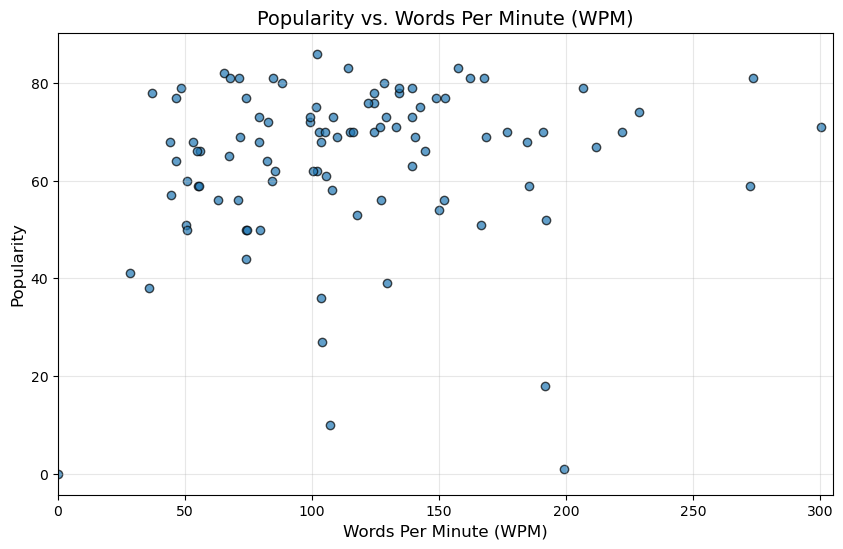

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
songs_df = pd.read_csv('songs.csv')  # Replace 'path_to_songs.csv' with the actual file path
lyrics_df = pd.read_csv('lyrics.csv')  # Replace 'path_to_lyrics.csv' with the actual file path

# Function to convert duration to seconds
def duration_to_seconds(duration):
    try:
        minutes, seconds = map(int, duration.split(':'))
        return minutes * 60 + seconds
    except:
        return 0  # Default to 0 for invalid or missing values

# Process the lyrics dataset
lyrics_df['duration_seconds'] = lyrics_df['duration'].apply(duration_to_seconds)
lyrics_df['word'] = pd.to_numeric(lyrics_df['word'], errors='coerce').fillna(0).astype(int)
lyrics_df['wpm'] = pd.to_numeric(lyrics_df['wpm'], errors='coerce').fillna(0)

# Process the songs dataset
songs_df['popularity'] = pd.to_numeric(songs_df['popularity'], errors='coerce').fillna(0)

# Visualization 1: Popularity vs. Words Per Minute (WPM) from songs_df and lyrics_df separately
plt.figure(figsize=(10, 6))
plt.scatter(lyrics_df['wpm'], songs_df['popularity'], alpha=0.7, edgecolor='k')
plt.title('Popularity vs. Words Per Minute (WPM)', fontsize=14)
plt.xlabel('Words Per Minute (WPM)', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.grid(alpha=0.3)
plt.xlim(0,305)
plt.show()





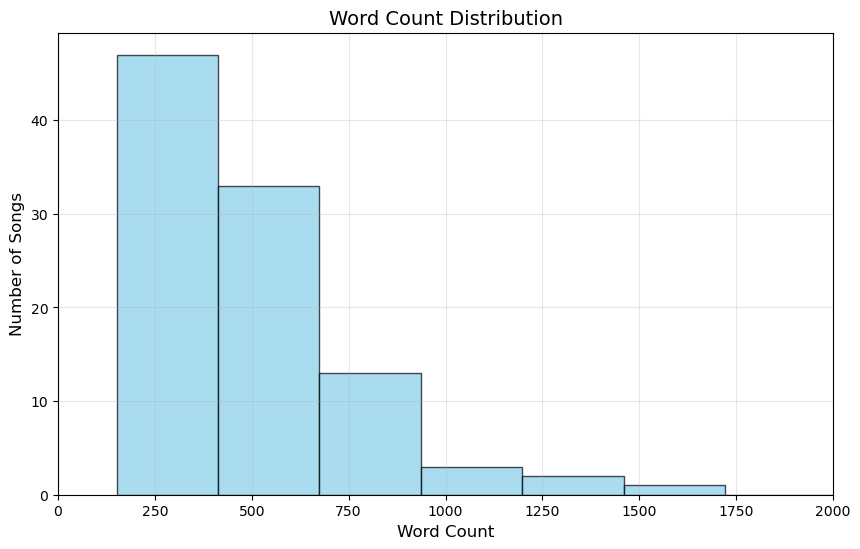

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
songs_df = pd.read_csv('songs.csv')  # Replace 'path_to_songs.csv' with the actual file path
lyrics_df = pd.read_csv('lyrics.csv')  # Replace 'path_to_lyrics.csv' with the actual file path

# Visualization 2: Word Count Distribution (only from lyrics.csv)
plt.figure(figsize=(10, 6))
plt.hist(lyrics_df['word'], bins=15, color='skyblue', edgecolor='k', alpha=0.7)
plt.title('Word Count Distribution', fontsize=14)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)
plt.grid(alpha=0.3)
plt.xlim(0,2000)
plt.show()

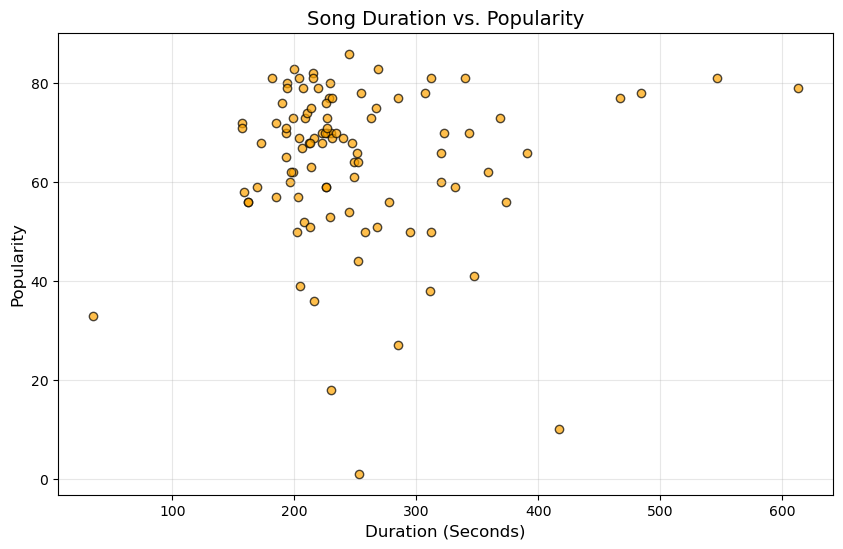

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
songs_df = pd.read_csv('songs.csv')  # Replace 'path_to_songs.csv' with the actual file path
lyrics_df = pd.read_csv('lyrics.csv')  # Replace 'path_to_lyrics.csv' with the actual file path

def duration_to_seconds(duration):
    try:
        minutes, seconds = map(int, duration.split(':'))
        return minutes * 60 + seconds
    except:
        return 0  # Default to 0 for invalid or missing values

# Process the lyrics dataset
lyrics_df['duration_seconds'] = lyrics_df['duration'].apply(duration_to_seconds)
lyrics_df['word'] = pd.to_numeric(lyrics_df['word'], errors='coerce').fillna(0).astype(int)
lyrics_df['wpm'] = pd.to_numeric(lyrics_df['wpm'], errors='coerce').fillna(0)

# Visualization 3: Song Duration vs. Popularity (lyrics duration and songs popularity)
plt.figure(figsize=(10, 6))
plt.scatter(lyrics_df['duration_seconds'], songs_df['popularity'], alpha=0.7, edgecolor='k', color='orange')
plt.title('Song Duration vs. Popularity', fontsize=14)
plt.xlabel('Duration (Seconds)', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

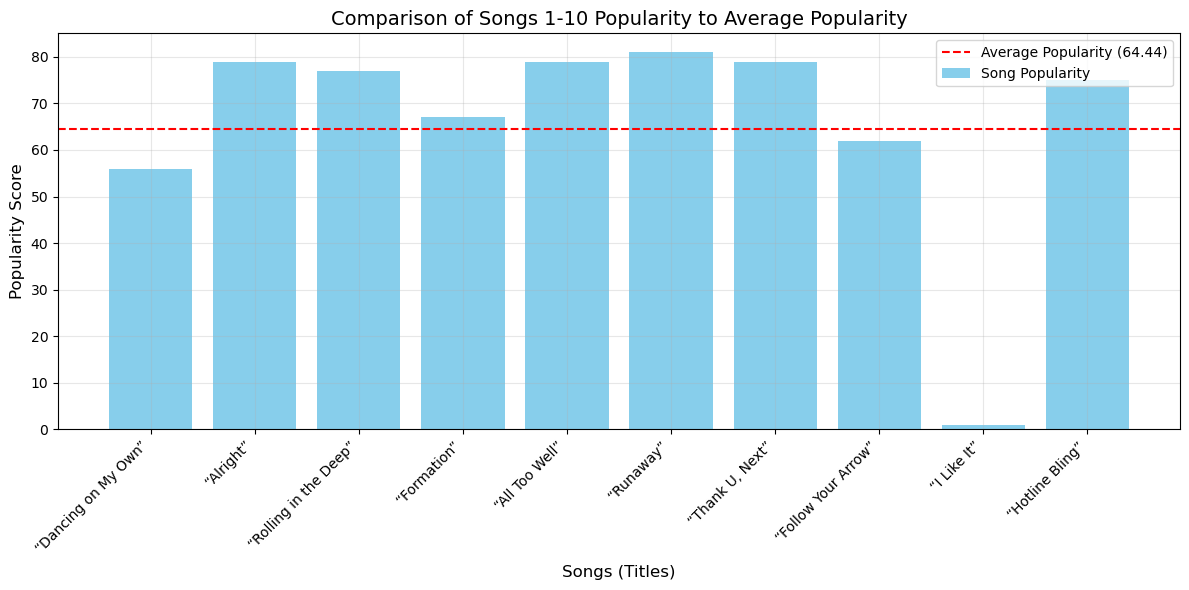

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
songs_df = pd.read_csv('songs.csv')  # Replace 'path_to_songs.csv' with the actual file path
lyrics_df = pd.read_csv('lyrics.csv')  # Replace 'path_to_lyrics.csv' with the actual file path

average_popularity = songs_df['popularity'].mean()

# Filter for IDs 1-10
subset_df = songs_df[songs_df['id'].between(1, 10)]

# Visualization: Popularity of songs with IDs 1-10 compared to average popularity
plt.figure(figsize=(12, 6))
x_labels = subset_df['title']
popularity_scores = subset_df['popularity']

plt.bar(x_labels, popularity_scores, color='skyblue', label='Song Popularity')
plt.axhline(y=average_popularity, color='red', linestyle='--', label=f'Average Popularity ({average_popularity:.2f})')

plt.title('Comparison of Songs 1-10 Popularity to Average Popularity', fontsize=14)
plt.xlabel('Songs (Titles)', fontsize=12)
plt.ylabel('Popularity Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
songs_df = pd.read_csv('songs.csv')  # Replace 'path_to_songs.csv' with the actual file path
lyrics_df = pd.read_csv('lyrics.csv')  # Replace 'path_to_lyrics.csv' with the actual file path

def full_appearance_count(artists_column):
    artist_counts = {}
    for entry in artists_column:
        if isinstance(entry, str):
            # Split by common separators (commas, "and", "feat.", "featuring")
            artists = [artist.strip() for artist in entry.replace("feat.", ",")
                       .replace("featuring", ",").replace("and", ",").split(",")]
            for artist in artists:
                if artist:  # Ensure the artist name is not empty
                    artist_counts[artist] = artist_counts.get(artist, 0) + 1  # Count all as full appearances
    return artist_counts

# Apply updated logic to count appearances for all artists
full_artist_counts = full_appearance_count(songs_df['artist'])

# Convert to a sorted pandas Series for visualization
full_artist_counts_series = pd.Series(full_artist_counts).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
full_artist_counts_series.head(10).plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.8)

plt.title('Top 10 Artists by Full Number of Songs (Including Features)', fontsize=14)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()